In [1]:
#Supervised/Classification/Decision-Tree
import pandas as pd
from sklearn.model_selection import train_test_split
import category_encoders as ce

In [2]:
df = pd.read_csv('car_evaluation.csv')

In [3]:
df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [4]:
df.describe()

,vhigh,vhigh.1,2,2.1,small,low,unacc
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [5]:
col_name = ['buying','maintainence','doors','persons','lug_boot','saftey','class']
df.columns=col_name

In [6]:
df

,buying,maintainence,doors,persons,lug_boot,saftey,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [7]:
df.head()

,buying,maintainence,doors,persons,lug_boot,saftey,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [8]:
df.tail()

,buying,maintainence,doors,persons,lug_boot,saftey,class
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [9]:
df.dtypes

buying          object
maintainence    object
doors           object
persons         object
lug_boot        object
saftey          object
class           object
dtype: object

In [10]:
df.isnull().sum()

buying          0
maintainence    0
doors           0
persons         0
lug_boot        0
saftey          0
class           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1727 non-null   object
 1   maintainence  1727 non-null   object
 2   doors         1727 non-null   object
 3   persons       1727 non-null   object
 4   lug_boot      1727 non-null   object
 5   saftey        1727 non-null   object
 6   class         1727 non-null   object
dtypes: object(7)
memory usage: 47.3+ KB


# Encoding
# It is process of converting string into integer
# It is done according to ordinal and nominal categorical data


In [12]:
df

,buying,maintainence,doors,persons,lug_boot,saftey,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [13]:
x =df.iloc[:,:6]
y = df.iloc[:,6:]

In [14]:
x

,buying,maintainence,doors,persons,lug_boot,saftey
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [15]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1722,good
1723,vgood
1724,unacc
1725,good


In [16]:
y = df.iloc[:,6:]

In [17]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1722,good
1723,vgood
1724,unacc
1725,good


In [18]:
y

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc
...,...
1722,good
1723,vgood
1724,unacc
1725,good


In [19]:
x

,buying,maintainence,doors,persons,lug_boot,saftey
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=(0))

In [21]:
X_train

,buying,maintainence,doors,persons,lug_boot,saftey
580,high,high,3,4,med,high
1214,med,low,3,2,small,low
1664,low,low,3,more,small,low
661,high,med,2,4,med,high
587,high,high,3,more,med,low
...,...,...,...,...,...,...
835,high,low,4,more,big,high
1216,med,low,3,2,small,high
1653,low,low,3,2,big,med
559,high,high,2,more,small,high


In [22]:
X_test

,buying,maintainence,doors,persons,lug_boot,saftey
1318,low,vhigh,2,more,med,high
124,vhigh,high,2,4,big,high
648,high,med,2,2,small,med
249,vhigh,med,3,2,big,med
1598,low,med,5more,2,big,low
...,...,...,...,...,...,...
906,med,vhigh,3,4,big,med
309,vhigh,med,5more,4,med,med
838,high,low,5more,2,small,high
1076,med,high,5more,more,big,low


In [23]:
#Feature engineering is converting raw features into useful

In [24]:
!pip install category_encoders

Defaulting to user installation because normal site-packages is not writeable


In [25]:
import category_encoders as ce

In [26]:
coders=ce.OrdinalEncoder(cols=['buying','maintainence','doors','persons','lug_boot','saftey'])

In [27]:
coders

OrdinalEncoder(cols=['buying', 'maintainence', 'doors', 'persons', 'lug_boot',
                     'saftey'])

In [28]:
import category_encoders as ce
coders=ce.OrdinalEncoder(cols=['buying','maintainence','doors','persons','lug_boot','saftey'])
X_train = coders.fit_transform(X_train)
X_test = coders.transform(X_test)

In [29]:
X_train

,buying,maintainence,doors,persons,lug_boot,saftey
580,1,1,1,1,1,1
1214,2,2,1,2,2,2
1664,3,2,1,3,2,2
661,1,3,2,1,1,1
587,1,1,1,3,1,2
...,...,...,...,...,...,...
835,1,2,4,3,3,1
1216,2,2,1,2,2,1
1653,3,2,1,2,3,3
559,1,1,2,3,2,1


In [30]:
X_test

,buying,maintainence,doors,persons,lug_boot,saftey
1318,3,4,2,3,1,1
124,4,1,2,1,3,1
648,1,3,2,2,2,3
249,4,3,1,2,3,3
1598,3,3,3,2,3,2
...,...,...,...,...,...,...
906,2,4,1,1,3,3
309,4,3,3,1,1,3
838,1,2,3,2,2,1
1076,2,1,3,3,3,2


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc = RandomForestClassifier(n_estimators = 100, random_state =(40))

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, random_state =(40))
rfc.fit(X_train,y_train)

C:\TEMP\ipykernel_7952\4172688065.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(random_state=40)

In [34]:
y_pred = rfc.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print(accuracy_score(y_test,y_pred))

0.9383429672447013


In [37]:
#View feature score

In [38]:
feature_score = pd.Series(rfc.feature_importances_,index = X_train.columns).sort_values()
print(feature_score)

doors           0.088951
lug_boot        0.094800
maintainence    0.158626
buying          0.180451
persons         0.231303
saftey          0.245869
dtype: float64


Text(0.5, 1.0, 'Importance')

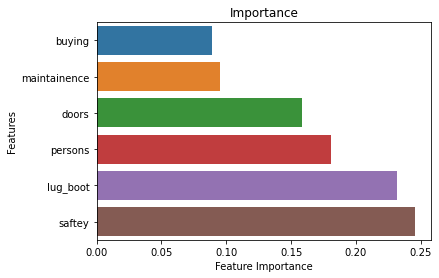

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x=feature_score,y=['buying','maintainence','doors','persons','lug_boot','saftey'])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Importance")

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.88      0.84      0.86       116
        good       0.87      0.62      0.72        21
       unacc       0.95      0.99      0.97       358
       vgood       1.00      0.88      0.93        24

    accuracy                           0.94       519
   macro avg       0.93      0.83      0.87       519
weighted avg       0.94      0.94      0.94       519

